Кількість відсутніх значень у кожній колонці:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
DiseaseStatus                 0
dtype: int64


/var/folders/2p/9w_jl5nn6z7bz0trkmpb08cr0000gn/T/ipykernel_4872/3755628963.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


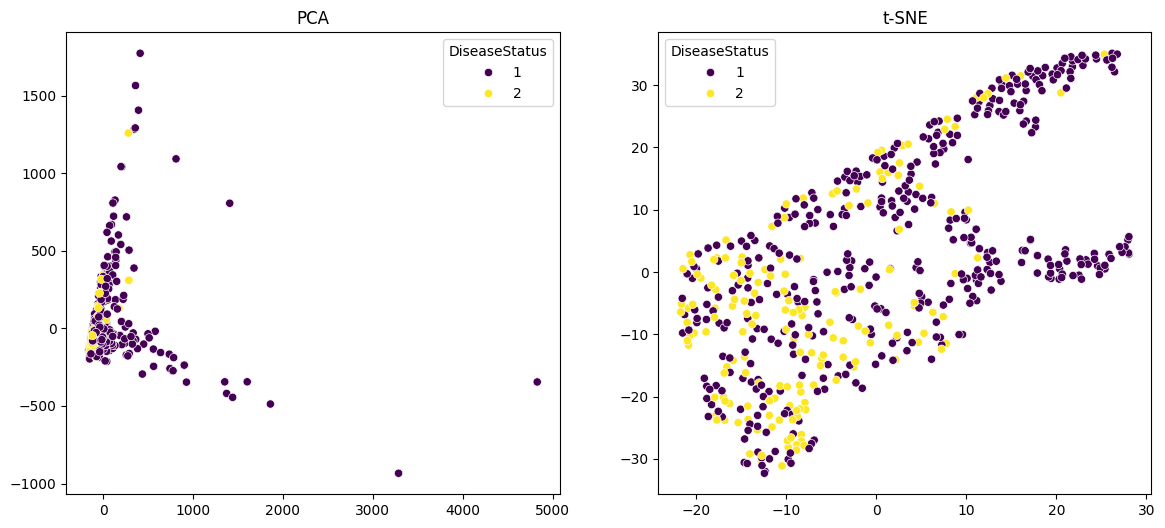

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage import io

# Завантаження даних із CSV
data = pd.read_csv('indian_liver_patient.csv')

# Перевірка наявності NaN
print("Кількість відсутніх значень у кожній колонці:")
print(data.isna().sum())

# Заповнення числових NaN середнім значенням
data.fillna(data.mean(numeric_only=True), inplace=True)

# Якщо є категорійні колонки (наприклад, 'Gender'), заповнюємо найбільш поширеним значенням
if 'Gender' in data.columns:
    data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


# Виділення числових колонок для зниження розмірності
X = data[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
          'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 
          'Albumin', 'Albumin_and_Globulin_Ratio']]
y = data['DiseaseStatus']  # Використовується як мітка для візуалізації

# 2. Зниження розмірності та візуалізація

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Візуалізація PCA та t-SNE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, ax=ax1, palette='viridis')
ax1.set_title("PCA")

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, ax=ax2, palette='viridis')
ax2.set_title("t-SNE")
plt.show()


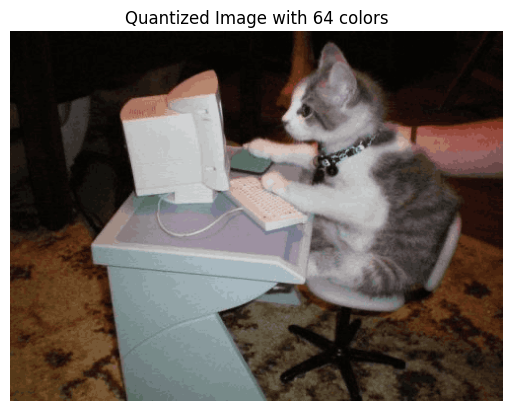

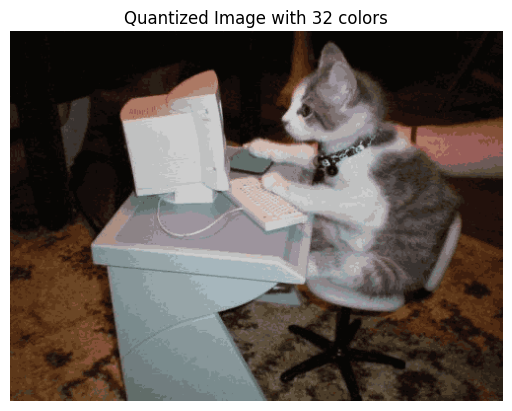

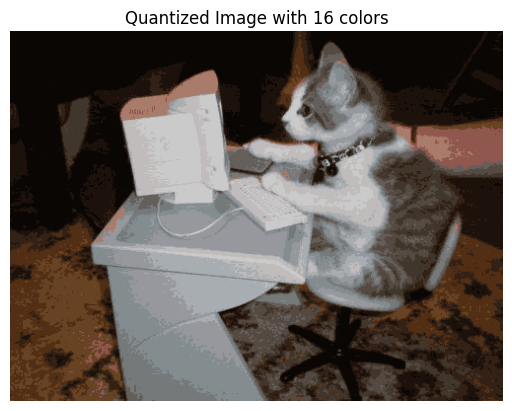

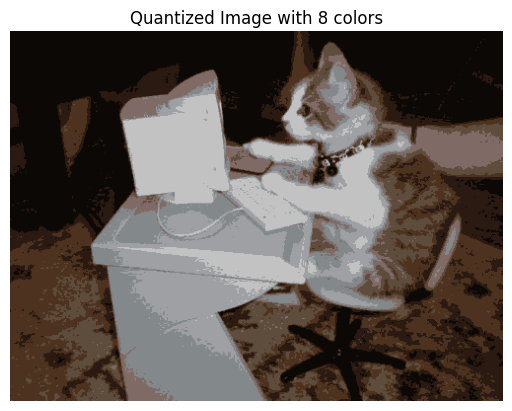

In [17]:
# Завантаження зображення
image = io.imread('cat.jpeg')
image_2d = image.reshape(-1, 3)

# Квантування зображення на 64, 32, 16, 8 кольорів
for n_clusters in [64, 32, 16, 8]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(image_2d)
    quantized_image = kmeans.cluster_centers_.astype(int)[labels]
    quantized_image = quantized_image.reshape(image.shape)

    # Відображення результату
    plt.figure()
    plt.title(f"Quantized Image with {n_clusters} colors")
    plt.imshow(quantized_image)
    plt.axis('off')
    plt.show()

Назви колонок у датасеті: Index(['Text', 'Sentiment', 'Unnamed: 2'], dtype='object')
                                                Text Sentiment Unnamed: 2
0  Such an easy app to use, really quick and easy...  positive        NaN
1  The drivers and the services have been excepti...  positive        NaN
2                     All rides have been enjoyable.  positive        NaN
3                       Driver very knew where I was   neutral        NaN
4      most driver's are child friendly and patient.  positive        NaN
Нові назви колонок: Index(['Text', 'Sentiment'], dtype='object')


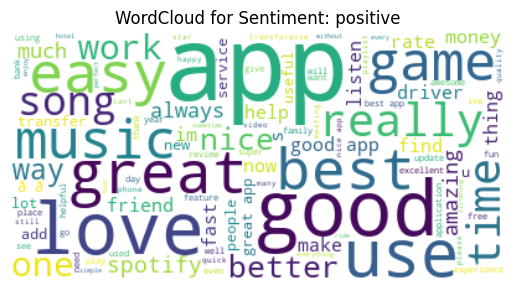

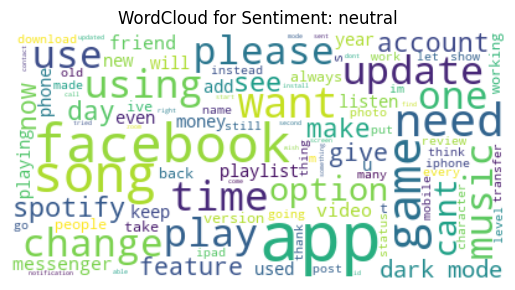

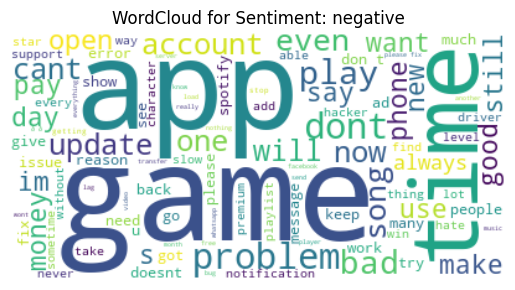

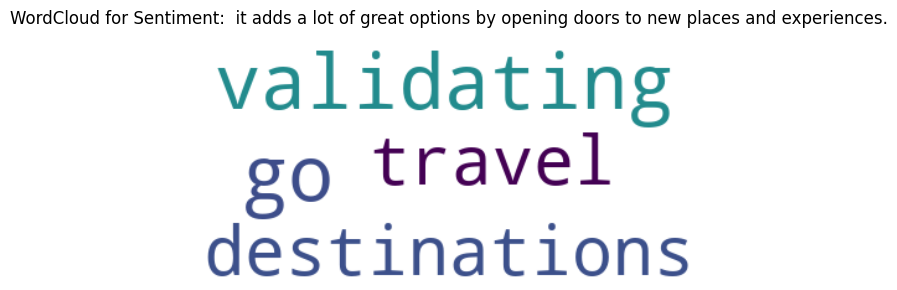

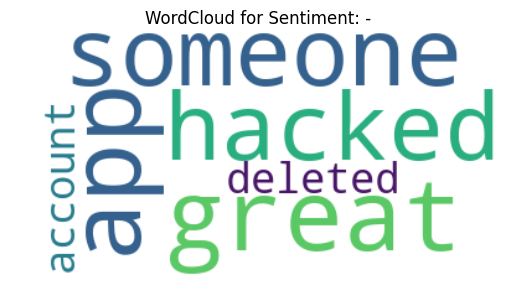

              precision    recall  f1-score   support

           -       0.00      0.00      0.00         1
    negative       0.82      0.83      0.82       439
     neutral       0.75      0.74      0.75       326
    positive       0.89      0.89      0.89       419

    accuracy                           0.83      1185
   macro avg       0.61      0.61      0.61      1185
weighted avg       0.82      0.83      0.82      1185



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Завантаження текстового датасету
data_texts = pd.read_csv('text.csv')

# Перевірка структури даних
print("Назви колонок у датасеті:", data_texts.columns)
print(data_texts.head())

# Видалимо зайві колонки, якщо вони є, залишивши лише перші дві
data_texts = data_texts.iloc[:, :2]  # Тільки перші дві колонки

# Перейменування колонок
data_texts.columns = ['Text', 'Sentiment']
print("Нові назви колонок:", data_texts.columns)

# 1. Передобробка тексту
data_texts['Text'] = data_texts['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

# 2. Побудова хмари слів для кожного класу
for sentiment in data_texts['Sentiment'].unique():
    class_text = " ".join(data_texts[data_texts['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(max_words=100, background_color='white').generate(class_text)
    
    plt.figure()
    plt.title(f"WordCloud for Sentiment: {sentiment}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 3. Векторизація тексту
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = tfidf.fit_transform(data_texts['Text'])
y = data_texts['Sentiment']

# 4. Розподіл на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# 5. Навчання класифікатора
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Оцінка якості
print(classification_report(y_test, y_pred))
